### Single Variable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [2]:
df = pd.read_csv('E:/Data Science/ML/Linear Regression/Canada_Income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


Text(0, 0.5, 'per capita income (US$)')

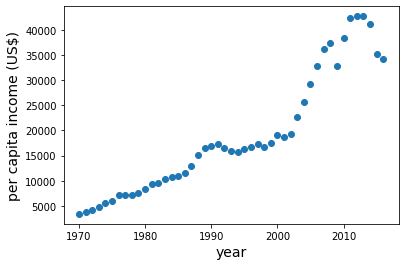

In [4]:
plt.scatter(df['year'],df['per capita income (US$)'])
plt.xlabel('year',fontsize = 14)
plt.ylabel('per capita income (US$)',fontsize = 14)

In [5]:
df['year'] = pd.to_numeric(df['year'])
df['per capita income (US$)'] = pd.to_numeric(df['per capita income (US$)'])
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [6]:
reg.coef_

array([828.46507522])

In [7]:
reg.intercept_

-1632210.7578554575

In [8]:
reg.predict([[2020]])

c:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [9]:
df1 = {'year': 2020, 'per capita income (US$)': 41288.69409442}
df.append(df1, ignore_index = True).tail()

C:\Users\bakul\AppData\Local\Temp/ipykernel_13748/4196641948.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(df1, ignore_index = True).tail()


,year,per capita income (US$)
43,2013.0,42676.468370
44,2014.0,41039.893600
45,2015.0,35175.188980
46,2016.0,34229.193630
47,2020.0,41288.694094


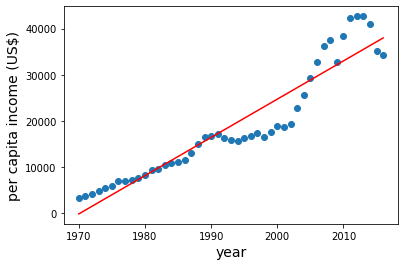

In [10]:
plt.scatter(df['year'], df['per capita income (US$)'])
plt.plot(df['year'], reg.predict(df[['year']]), color='red')
plt.xlabel('year', fontsize=14)
plt.ylabel('per capita income (US$)', fontsize=14)
plt.show()

### Multiple Variable

In [11]:
df2 = pd.read_csv('E:/Data Science/ML/Linear Regression/Salary_predict.csv')
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
df2.experience=df2.experience.fillna('zero')
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [13]:
df2['experience']=df2['experience'].apply(w2n.word_to_num)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [14]:
import math
mean_test_score=math.floor(df2['test_score(out of 10)'].mean())
mean_test_score

7

In [15]:
df2['test_score(out of 10)']=df2['test_score(out of 10)'].fillna(mean_test_score)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [16]:
reg1 = linear_model.LinearRegression()
reg1.fit(df2[['experience','test_score(out of 10)','interview_score(out of 10)']],df2['salary($)'])

LinearRegression()

In [17]:
reg1.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [18]:
reg1.intercept_

14992.65144669314

In [19]:
reg1.predict([[2,9,6]])

c:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [20]:
reg1.predict([[12,10,10]])

c:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

### Dummy Variable and One hot encoding

In [21]:
df3 = pd.read_csv("E:/Data Science/ML/Linear Regression/Carprices.csv")
df3

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [22]:
dummies = pd.get_dummies(df3['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [23]:
merged = pd.concat([df3,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [24]:
final = merged.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


#### To prevent from Dummy variable trap

In [25]:
final = final.drop(['Audi A5'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [26]:
X = final.drop(['Sell Price($)'],axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [27]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(X,y)

LinearRegression()

In [30]:
model.predict([[45000,4,1,0]])

c:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30253.10988495])

In [31]:
model.predict([[86000,7,0,1]])

c:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17818.95045785])

In [32]:
model.score(X,y)

0.9417050937281082